In [49]:
 #Import delle librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud

# Raccolta e ispezione preliminare dei dati

In [240]:
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

dataset = pd.read_csv("../../data/sentiment140_raw.csv", encoding="ISO-8859-1", low_memory=False, names=column_names, header=None)

dataset.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [241]:
#Bisogna capire quante sono le osservazioni (righe) e quante sono le caratteristiche di ogni osservazione (colonne)
print("Dimensioni del dataset (righe, colonne):", dataset.shape)

Dimensioni del dataset (righe, colonne): (1600000, 6)


In [242]:
# Verifica tipi di dati per le colonne del dataset
print("\nTipi di dati:\n", dataset.dtypes)


Tipi di dati:
 target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object


In [243]:
#Si controlla se nel dataset sono presenti valori nulli o stringhe vuote
print("Valori nulli e stringhe vuote per colonna:")
print((dataset.isnull() | dataset.apply(lambda x: x.astype(str).str.strip() == "")).sum())

Valori nulli e stringhe vuote per colonna:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [244]:
#Verifica dei duplicati
text_counts = dataset['text'].value_counts()

duplicati = text_counts[text_counts > 1]

print("Testi duplicati e il numero di ripetizioni:")
print(duplicati)

Testi duplicati e il numero di ripetizioni:
text
isPlayer Has Died! Sorry                                                                                        210
good morning                                                                                                    118
headache                                                                                                        115
Good morning                                                                                                    112
Headache                                                                                                        106
                                                                                                               ... 
@mikeyway http://twitpic.com/7j4ra - where can you buy this??? i wont drink the pop i just want the bottle!       2
@KhloeKardashian Definitely my Mom. And Angelina Jolie                                                            2
cedar point with my bif

In [245]:
# Conta il numero totale di duplicati nella colonna 'text'
numero_duplicati = dataset['text'].duplicated().sum()
print("Numero totale di duplicati nella colonna 'text':", numero_duplicati)

Numero totale di duplicati nella colonna 'text': 18534



Numero di tweet per ciascuna classe:
0: 800000
4: 800000


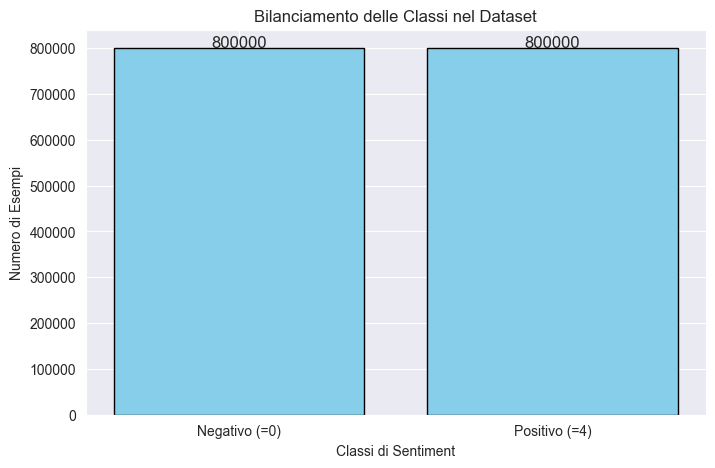

In [246]:
# Conteggio delle classi nel dataset originale
sentiment_counts = dataset['target'].value_counts()

# Stampa del numero di tweet per ciascuna classe
print("\nNumero di tweet per ciascuna classe:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

# Creazione del diagramma a barre con posizioni corrette
plt.figure(figsize=(8, 5))

# Posizioni per le barre (0 e 1 invece di 0 e 4)
bar_positions = range(len(sentiment_counts))
plt.bar(bar_positions, sentiment_counts.values, color='skyblue', edgecolor='black')

# Imposta le etichette personalizzate per l'asse X
plt.xticks(bar_positions, ["Negativo (=0)", "Positivo (=4)"])

plt.xlabel("Classi di Sentiment")
plt.ylabel("Numero di Esempi")
plt.title("Bilanciamento delle Classi nel Dataset")

# Aggiunta dei valori sopra le barre
for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=12)

plt.show()

# Riduzione del dataset

In [247]:
# Imposta un seed per la riproducibilità
random_seed = 46

column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

dataset = pd.read_csv("../../data/sentiment140_raw.csv", encoding="ISO-8859-1", low_memory=False, names=column_names, header=None)

# Frazione per ottenere 100k tweet: 100000 / 1600000 = 0.0625
sample_fraction = 0.0625

# Campionamento stratificato con random seed
dataset_reduced = dataset.groupby('target', group_keys=False).apply(
    lambda x: x.sample(frac=sample_fraction, random_state=random_seed)
)

# Verifica
print("\nDimensioni dataset ridotto:", dataset_reduced.shape)


Dimensioni dataset ridotto: (100000, 6)


C:\Users\pomic\AppData\Local\Temp\ipykernel_28108\1428372456.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset_reduced = dataset.groupby('target', group_keys=False).apply(


In [248]:
# Salva il subset ridotto in un nuovo CSV
dataset_reduced.to_csv('../../data/sentiment140_reduced.csv', index=False, encoding='latin-1')
# Apri il dataset ridotto direttamente
dataset_reduced_opened = pd.read_csv('../../data/sentiment140_reduced.csv', encoding='latin-1')

In [249]:
dataset_reduced.head()

,target,id,date,flag,user,text
560773,0,2205266671,Wed Jun 17 04:21:24 PDT 2009,NO_QUERY,SparkleAndSpunk,@SushiDeathNo1 - bÃ¶Ã¶Ã¶Ã¶ll... I'M BORED!
24265,0,1557952094,Sun Apr 19 06:42:20 PDT 2009,NO_QUERY,TexasTerri,My that's early. I wish I enjoyed mornings more. So much more of a night person so stay up too late and still forced to get up in the AM.
204478,0,1972627285,Sat May 30 09:34:54 PDT 2009,NO_QUERY,hippie_420_gurl,Is on her way to get a new pipe. My other broke
782705,0,2323727950,Thu Jun 25 01:20:10 PDT 2009,NO_QUERY,Kali23,@DowneyJr you forgot all about me
768428,0,2300962221,Tue Jun 23 14:49:12 PDT 2009,NO_QUERY,ApatheticZodiac,"@maria_lovsya boo, what a dirty trick"


In [250]:
#Si controlla se nel dataset sono presenti valori nulli o stringhe vuote
print("Valori nulli e stringhe vuote per colonna:")
print((dataset_reduced.isnull() | dataset_reduced.apply(lambda x: x.astype(str).str.strip() == "")).sum())

Valori nulli e stringhe vuote per colonna:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64



Numero di tweet per ciascuna classe:
0: 50000
4: 50000


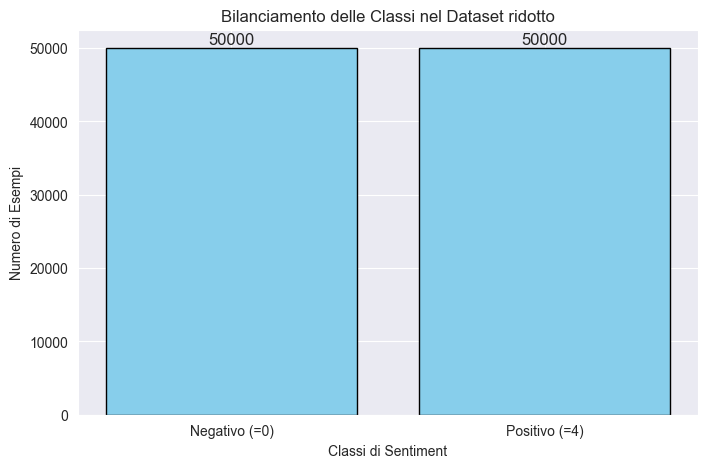

In [251]:
sentiment_counts = dataset_reduced['target'].value_counts()

# Stampa del numero di tweet per ciascuna classe
print("\nNumero di tweet per ciascuna classe:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

# Creazione del diagramma a barre con posizioni corrette
plt.figure(figsize=(8, 5))

# Posizioni per le barre (0 e 1 invece di 0 e 4)
bar_positions = range(len(sentiment_counts))
plt.bar(bar_positions, sentiment_counts.values, color='skyblue', edgecolor='black')

# Imposta le etichette personalizzate per l'asse X
plt.xticks(bar_positions, ["Negativo (=0)", "Positivo (=4)"])

plt.xlabel("Classi di Sentiment")
plt.ylabel("Numero di Esempi")
plt.title("Bilanciamento delle Classi nel Dataset ridotto")

# Aggiunta dei valori sopra le barre
for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=12)

plt.show()

In [252]:
#Verifica dei duplicati
text_counts = dataset_reduced['text'].value_counts()

duplicati = text_counts[text_counts > 1]

print("Testi duplicati e il numero di ripetizioni:")
print(duplicati)

Testi duplicati e il numero di ripetizioni:
text
isPlayer Has Died! Sorry                                                                                                                    15
My head hurts                                                                                                                               10
Headache                                                                                                                                     9
headache                                                                                                                                     8
Need to send emails to 100,000  contacts? Check out EmailUnlimited on http://www.4officeautomation.com                                       8
                                                                                                                                            ..
Happy Mother's Day!                                                                          

In [228]:
# Conta il numero totale di duplicati nella colonna 'text'
numero_duplicati = dataset_reduced['text'].duplicated().sum()
print("Numero totale di duplicati nella colonna 'text':", numero_duplicati)

Numero totale di duplicati nella colonna 'text': 296


In [253]:
dataset_reduced[dataset_reduced['text'].duplicated()]

,target,id,date,flag,user,text
334816,0,2013655343,Tue Jun 02 23:13:18 PDT 2009,NO_QUERY,wtfjessf,headache
627934,0,2231091341,Thu Jun 18 18:01:59 PDT 2009,NO_QUERY,ppppreet,headache
616365,0,2226633025,Thu Jun 18 12:11:31 PDT 2009,NO_QUERY,WallTweet,@workformeonline I didn't understand that Try commands like 'Buy 30 #tag' or 'Sell 30 #tag'
717150,0,2259912493,Sat Jun 20 18:21:57 PDT 2009,NO_QUERY,ashleystetson08,I don't feel good
628171,0,2231208497,Thu Jun 18 18:11:32 PDT 2009,NO_QUERY,sarah_z3,I am so so so so so bored of studying
...,...,...,...,...,...,...
924282,4,1754938588,Sun May 10 07:49:09 PDT 2009,NO_QUERY,CDWeidner,Happy Mother's Day!
1488427,4,2068496169,Sun Jun 07 14:10:48 PDT 2009,NO_QUERY,SpiritOfSuccess,"If you like Bob Proctor and The Law of Attraction, then you'll likely benefit from this secret. http://bit.ly/wpvbG"
1293388,4,2003203497,Tue Jun 02 06:05:11 PDT 2009,NO_QUERY,MarketingCat,"Need to send emails to 100,000 contacts? Check out EmailUnlimited on http://www.4officeautomation.com"
1133419,4,1976168833,Sat May 30 16:44:17 PDT 2009,NO_QUERY,tasneemk,thunderstorm


In [255]:
#Analisi della lunghezza dei tweet
lunghezze = dataset_reduced["text"].str.len()

# Calcola i valori minimo, massimo e la media
lunghezza_minima = lunghezze.min()
lunghezza_massima = lunghezze.max()
lunghezza_media   = lunghezze.mean()

print("Lunghezza minima:", lunghezza_minima)
print("Lunghezza massima:", lunghezza_massima)
print("Lunghezza media:", lunghezza_media)

Lunghezza minima: 7
Lunghezza massima: 243
Lunghezza media: 74.10934


In [271]:
#Visualizzazione tweet lunghezza massima
# Calcola l'indice del tweet con la lunghezza massima
indice_massimo = dataset_reduced["text"].str.len().idxmax()

# Estrai il tweet con la lunghezza massima
tweet_massimo = dataset_reduced.loc[indice_massimo, "text"]

print("Tweet con la lunghezza massima:")
print(tweet_massimo)

Tweet con la lunghezza massima:
Things â Ñ?ÑÐ¾ ÐÐµÑÑ!  Ð¡ÑÐ¼ÐµÐ» ÑÐ°Ð·Ð³ÑÐµÑ?ÑÐ¸ ÑÐ°ÐºÐ¾Ð¹ Ð·Ð°Ð²Ð°Ð» Ð² Ð¿Ð¾Ð´Ð³Ð¾ÑÐ¾Ð²ÐºÐµ Ð¿ÑÐµÐ´Ñ?ÑÐ¾Ñ?ÑÐ¸Ñ Ð¿ÑÐ¾ÐµÐºÑÐ¾Ð², ÑÑÐ¾ Ñ?ÐµÑÐ´ÑÐµ ÑÐ°Ð´ÑÐµÑÑ?Ñ?! Ð¢ÐµÐ¿ÐµÑÑ Ð² Ð´ÑÑ Ð¸ ÑÑÐ¸ÑÑÑ?Ñ?, ÑÑÐ¸ÑÑÑ?Ñ?...


In [257]:
#Visualizzazione tweet lunghezza minima
# Calcola l'indice del tweet con la lunghezza minima
indice_minimo = dataset_reduced["text"].str.len().idxmin()

# Estrai il tweet con la lunghezza minima
tweet_minimo = dataset_reduced.loc[indice_minimo, "text"]

print("Tweet con la lunghezza minima:")
print(tweet_minimo)

Tweet con la lunghezza minima:
Sunday 


In [258]:
#Visualizza il numero di testi troppo lunghi (più di 140 caratteri)
numero_lunghi = lunghezze[lunghezze > 140].count()
print("Numero di tweet con più di 140 caratteri:", numero_lunghi)

Numero di tweet con più di 140 caratteri: 997


In [259]:
#Visualizza numero di tweet con meno di 10 caratteri
numero_corti = lunghezze[lunghezze < 10].count()
print("Numero di tweet con meno di 10 caratteri:", numero_corti)

Numero di tweet con meno di 10 caratteri: 200


In [260]:
#Stampa tutti i tweet con lunghezza minore di 10 caratteri
print("Tweet con lunghezza minore di 10 caratteri:")
print(dataset_reduced[dataset_reduced['text'].str.len() < 10]['text'].tolist())


Tweet con lunghezza minore di 10 caratteri:
['headache ', 'selfish ', 'headache ', 'I lied. ', '@gphong ', 'please? ', 'Homework ', 'ow ow ow ', 'Whatever ', 'just  tbh', 'In class ', 'homework ', 'headache ', 'Sunday ', 'br cold! ', 'headace ', 'Sold out ', 'Headache ', 'Revision ', 'so cold ', 'So bored ', 'Still up ', 'pusiiing ', 'Annoyed ', 'My ears ', 'So tired ', 'Tireeed ', '@sheabop ', 'HEADACHE ', 'Waiting ', '@mMmily ', 'Learning ', ' why me?', ' my life', 'Yes I am ', 'cleaning ', 'grounded ', 'i am ill ', 'raining ', 'Headache ', 'stressed ', '@rebstew ', 'headache ', 'Work 9-6 ', 'learning ', 'RIP fish ', 'goodbye ', 'Confused ', 'ict....  ', 'bad day ', 'Hangover ', 'Headache ', 'restart. ', 'homework ', 'nope... ', 'Over it ', 'So tired ', 'Headache ', 'Blackout ', 'i is sad ', 'is tired ', 'at work ', 'Hiccups ', 'Hangover ', 'Workyyyy ', ' is hurty', 'Bad day ', 'am tired ', '@Shazzib ', 'Ugh work ', 'nothing ', 'Bad head ', 'headache ', 'Bad day. ', 'bad day ', 'revi

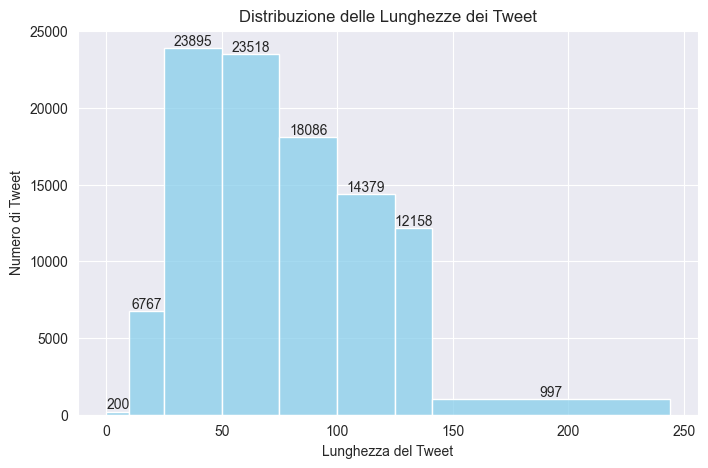

In [261]:
# Visualizzazione della distribuzione delle lunghezze dei tweet
plt.figure(figsize=(8, 5))

bins = [0, 10, 25, 50, 75, 100, 125, 141, max(lunghezze) + 1]

# Crea l'istogramma con 5 raggruppamenti
sns.histplot(lunghezze, bins=bins, color='skyblue')

# Aggiungi etichette agli assi
plt.xlabel("Lunghezza del Tweet")
plt.ylabel("Numero di Tweet")
plt.title("Distribuzione delle Lunghezze dei Tweet")

# Aggiungi annotazioni per il numero di tweet in ogni bin
bin_edges = plt.gca().patches
for bin_edge in bin_edges:
    height = bin_edge.get_height()
    if height > 0:
        plt.text(bin_edge.get_x() + bin_edge.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


In [262]:
#Stampa alcuni tweet con lughezza maggiore di 140 caratteri e minore di 10
print("Tweet con lunghezza maggiore di 140 caratteri:")
print(dataset_reduced[dataset_reduced['text'].str.len() > 140]['text'].head(3).tolist())

print("\nTweet con lunghezza minore di 10 caratteri:")
print(dataset_reduced[dataset_reduced['text'].str.len() < 10]['text'].head(3).tolist())

Tweet con lunghezza maggiore di 140 caratteri:
['on my third cup of New Orleans blend Community Coffee, man I miss my home  Anyway 3 day weekend this week &amp; new next week for Pioneer Day!', 'driving up 5, my parents lost a box that was tied to the roof. turns out it contained irreplacable photos,purikura,&amp;sentimental trinkets ', 'After over 3.5 hours, there is only about 15min of &quot;Backing up iPhone 3G...&quot; remaining. Hooray! Then I have to restore all my shit. ']

Tweet con lunghezza minore di 10 caratteri:
['headache ', 'selfish ', 'headache ']


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

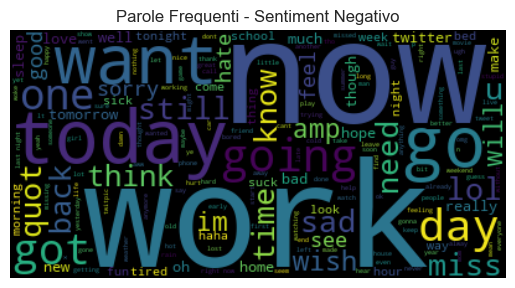

In [272]:
#Visualizzazione parole nei tweet negativi più frequenti
text_neg = ' '.join(dataset_reduced[dataset_reduced['target'] == 0]['text'])
wordcloud_neg = WordCloud().generate(text_neg)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Parole Frequenti - Sentiment Negativo')
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

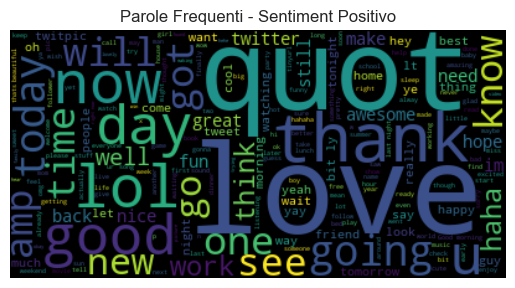

In [264]:
#Visualizzazione parole nei tweet positivi più frequenti
text_pos = ' '.join(dataset_reduced[dataset_reduced['target'] == 4]['text'])
wordcloud_pos = WordCloud().generate(text_pos)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Parole Frequenti - Sentiment Positivo')
plt.axis('off')

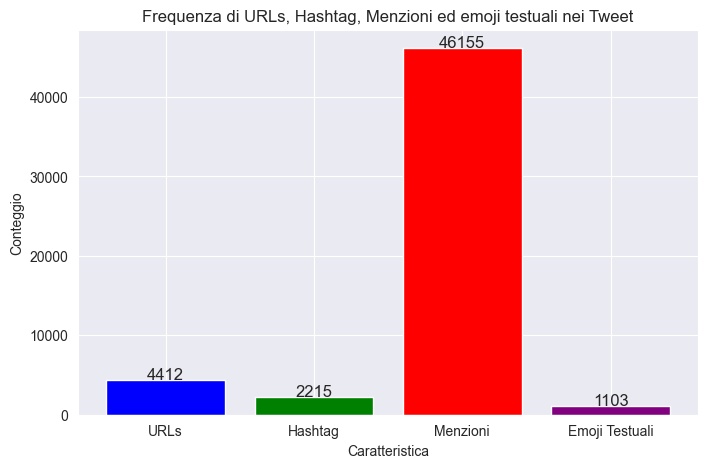

In [266]:
import re

textual_emoji_pattern = re.compile(r'(?:\:\)|\:\(|\:D|\:P|\;\)|\:\||\:O|\:S|\:X|\:3|<3|\:\*)')

# Numero di tweet che contengono URL, hashtag, menzioni e emoji testuali
count_urls = dataset_reduced['text'].str.contains('http[s]?://', regex=True).sum()
count_hashtags = dataset_reduced['text'].str.contains('#\w+', regex=True).sum()
count_mentions = dataset_reduced['text'].str.contains('@\w+', regex=True).sum()
count_textual_emojis = dataset_reduced['text'].str.contains(textual_emoji_pattern).sum()

# Dati per il grafico a barre
etichette = ['URLs', 'Hashtag', 'Menzioni', 'Emoji Testuali']
conteggi = [count_urls, count_hashtags, count_mentions, count_textual_emojis]

# Creazione del grafico a barre
plt.figure(figsize=(8, 5))
plt.bar(etichette, conteggi, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Caratteristica')
plt.ylabel('Conteggio')
plt.title('Frequenza di URLs, Hashtag, Menzioni ed emoji testuali nei Tweet')

for i, count in enumerate(conteggi):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.show()

In [273]:
# Imposta l'opzione per visualizzare l'intero contenuto delle celle
pd.set_option('display.max_colwidth', None)

# Stampa 3 esempi di tweet che contengono URL
print("Esempi di tweet con URL:")
print("\n".join(dataset_reduced[dataset_reduced['text'].str.contains('http[s]?://', regex=True)]['text'].head(3).tolist()))

# Stampa 3 esempi di tweet che contengono hashtag
print("\nEsempi di tweet con hashtag:")
print("\n".join(dataset_reduced[dataset_reduced['text'].str.contains('#\w+', regex=True)]['text'].head(3).tolist()))

# Stampa 3 esempi di tweet che contengono menzioni
print("\nEsempi di tweet con menzioni:")
print("\n".join(dataset_reduced[dataset_reduced['text'].str.contains('@\w+', regex=True)]['text'].head(3).tolist()))

# Stampa 3 esempi di tweet che contengono emoji testuali
print("\nEsempi di tweet con emoji testuali:")
print("\n".join(dataset_reduced[dataset_reduced['text'].str.contains(textual_emoji_pattern)]['text'].head(3).tolist()))

Esempi di tweet con URL:
Rob Williams is anchored/docked at  work  http://bit.ly/1PsOZ8
@xbllygbsn aah alright ;) lol. a know, but a dont wanna get it wrong either  lol :$ aaah alright, makes sence now... http://bit.ly/5AvNW
@drew Hang in there dude.  http://bit.ly/17RUwC #BlameDrewsCancer

Esempi di tweet con hashtag:
this is the scariest storm ever! i have never heard thunder like this.  #squarespace
@drew Hang in there dude.  http://bit.ly/17RUwC #BlameDrewsCancer
@austinheap: *PERSONALLY CONFIRMED FROM #IRAN* Tanks have rolled in Tehran ... #iranelection #gr88 Flash back to '79   (via @kingraam)

Esempi di tweet con menzioni:
@SushiDeathNo1 - bÃ¶Ã¶Ã¶Ã¶ll... I'M BORED! 
@DowneyJr you forgot all about me 
@maria_lovsya boo, what a dirty trick 

Esempi di tweet con emoji testuali:
@xbllygbsn aah alright ;) lol. a know, but a dont wanna get it wrong either  lol :$ aaah alright, makes sence now... http://bit.ly/5AvNW
@abbiiix  hehe thaaaanks abbii! ;) ooh! btw your hair is sooooo cool! 